In [1]:
# import of the reaction network library
from pyRN import pyRN
# initalization of the reaction network.
file = "../networks/RN_Ns_25_Norg_17_id_174.txt"
RN=pyRN.setFromText(file)

In [2]:
# creation of all connected closed Set, and all connected organizations
RN.setGenerators()
RN.setConnectedStr()

4436

We first identify the inflow of the reaction network. It is know from the theory that there is a process vector that overproduces the maximal set of species. Our analysis will focus on the effect of perturbations on each sub-organization of a given organization, when its operation is given by the maximal overproduction process. 

Perturbations are hence deactivations of inflow reactions.

The function `getallOpSp` generates all species that can be overproduced from a set of input `sp_set` (in our case it will be the organization we will study), constrained to set of trigerable reactions (allowed to occur) represented by a vector `pr`,  whose indexes represent the set of triggerable reactions (`pr`=None means all reactions can occur). While `getOpOrgProcess`, generates a process vector for the `sp_set` organization (`bitarray`), so that the set of species `opsp` (`bitarray`) is overproduced. Therefore, the process vector that returns `getOpOrgProcess` overproduces the maximal set of overproducible species.

In [3]:
bt_org=RN.ConnectedStrOrgListBtArray[1] # we select one of bitarray organization generated. 
print("the selected organization have the following speices:",RN.SpIdStrArray[bt_org.search(1)])
print("And the following active reactions:")
RN.printRp(r_set=RN.getTriggerableRpBtFromSp(bt_org))

the selected organization have the following speices: ['s02' 's04' 's08' 's10' 's13' 's14' 's15' 's18' 's19' 's20' 's21' 's22']
And the following active reactions:
r0:   => s19 
r1:   => s21 
r2:   s20 => 
r3:   s10 => 
r4:   s19 => s22 
r5:   s22 => s10 
r7:   s08 => s13 
r12:   s18 + s20 => s15 
r13:   s08 => s02 + s21 
r14:   s18 => s08 + s14 
r15:   s02 => s21 + s22 
r16:   s14 => s08 + s20 
r25:   s08 + s19 => s08 + s18 
r30:   s02 + s13 => s04 + s10 


In [4]:
opsp=RN.getallOpSpBt(bt_org,pr=None) # calculation all overproducible species
print("The overproducible species of the latter organization are:",RN.SpIdStrArray[opsp.search(1)])

The overproducible species of the latter organization are: ['s02' 's04' 's08' 's10' 's13' 's14' 's15' 's18' 's19' 's20' 's21' 's22']


In [5]:
import numpy as np

org_v=RN.getOpOrgProcess(sp_set=bt_org,opsp_set=opsp) # obtaining the process to overproduce all overproducible species
print("The process vector",org_v,"overproduce all later sepecies. We can apreciate at which rate operate over the reactions:")
RN.printRpFromProcess(np.where(org_v>=0)[0],org_v)

The process vector [8. 1. 1. 1. 1. 1. 0. 2. 0. 0. 0. 0. 1. 3. 4. 1. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 6. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] overproduce all later sepecies. We can apreciate at which rate operate over the reactions:
r0:   (8.0) => s19 
r1:   (1.0) => s21 
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r6:   s09 (0.0) => s21 
r7:   s08 (2.0) => s13 
r8:   s06 + s18 (0.0) => s02 
r9:   s07 + s08 (0.0) => s06 
r10:   s07 + s20 (0.0) => s13 
r11:   s01 + s06 (0.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r17:   s11 (0.0) => s03 + s24 
r18:   s25 (0.0) => s21 + s22 
r19:   s09 (0.0) => s07 + s08 
r20:   s17 (0.0) => s01 + s21 
r21:   s12 + s14 (0.0) => s02 + s12 
r22:   s05 + s18 (0.0) => s05 + s07 
r23:   s11 + s20 (0.0) => s01 + s20 
r24:   s15 + s16 (0.0) => s10 + s16 
r25:   s08 + s19 (6.0) => s08 + s18 
r26:   s11 + s17 

In [6]:
print("We can notice that all reactions with rate cero are not participating in the dynamics so we eliminate them to have a clear view for our propuse.")
RN.printRpFromProcess(np.where(org_v>0)[0],org_v)

We can notice that all reactions with rate cero are not participating in the dynamics so we eliminate them to have a clear view for our propuse.
r0:   (8.0) => s19 
r1:   (1.0) => s21 
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 


Note that for any given organization, `org_v` will activate all inflow reactions (empty set is contained in every organization thus inflow reactinos are triggerable). Furthermore, a process verifying a set of species is an organization must trigger all possibly triggerable reactions, i.e. the components of the process vector are positive. 

With this in consideration perturbations that eliminate inflow correspond to swithcing the process vector corresponding to the inflow reaction of the perturbed species to zero. For this we first consider a function that allows us to identify such species.

The function `getIflowSp` returns the indexes (`list`) of the species corresponding to inflow reactions for a set of inflow species. It receives as input a `bitarray` of `sp_set` species. 

In [7]:
inflow_species=RN.getInflowFromSp(bt_org) # Getting indexes of inflow species, 
# so we can choose which one to perturb

In [8]:
print("the inflow species are:",RN.SpIdStrArray[inflow_species])

the inflow species are: ['s19' 's21']


Next, the function `setInflowPert` returns the perturbation of a vector, considering the process vector of the organization (first argument of the function), the process vector to perturb (second argument of the function), the indexes of the species to perturb (third argument).

In [9]:
print("For example, we eliminate the following inflow")
 # chosing the species to be pertubed as inflow
inflow_pertubed_species=inflow_species[0:2]
print(RN.SpIdStrArray[inflow_pertubed_species])
#print(RN.SpIdStrArray[inflow_pertubed_species])
pertubed_v=RN.setInflowPert(org_v,org_v,inflow_pertubed_species) # setting the perturbation vector

print("we see that "+str(len(np.where(pertubed_v!=org_v)[0]))+" reactions change their kinetic coefficient to zero. Namely:")
RN.printRpFromProcess(np.where(pertubed_v!=org_v)[0],pertubed_v)

For example, we eliminate the following inflow
['s19' 's21']
we see that 2 reactions change their kinetic coefficient to zero. Namely:
r0:   (0.0) => s19 
r1:   (0.0) => s21 


In [10]:
print("the remaining "+str(len(np.where(pertubed_v>0)[0]))+" reactions are")
RN.printRpFromProcess(np.where(pertubed_v>0)[0],pertubed_v)

the remaining 12 reactions are
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 


In [11]:
inflow_pertubed_species=[inflow_species[0]] # the pertubed inflow must be an interable object, so in case of a single
print("We can repeat this, but in this case, we will only remove one species:",RN.SpIdStrArray[inflow_pertubed_species])
# species it must be a list
pertubed_v=RN.setInflowPert(org_v,org_v,inflow_pertubed_species) #perturbation of the process
print("Only "+str(len(np.where(pertubed_v!=org_v)[0]))+" reaction change their kinetic coefficient to zero.")
RN.printRpFromProcess(np.where(pertubed_v!=org_v)[0],pertubed_v)
print("And the remaining "+str(len(np.where(pertubed_v>0)[0]))+" reactions are")
RN.printRpFromProcess(np.where(pertubed_v>0)[0],pertubed_v)

We can repeat this, but in this case, we will only remove one species: ['s19']
Only 1 reaction change their kinetic coefficient to zero.
r0:   (0.0) => s19 
And the remaining 13 reactions are
r1:   (1.0) => s21 
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 


Note that components can be deactivated and activated again by the same function. In the case below we take the already perturbed vector and activate the component previously deactivated. The value taken by the aggregate component corresponds to the value of the process vector of the organization (`org_v`) multiplied by a normalization factor. There is also a fourth argument of the `setInflowPert` function, `bool` argument, that if it is `True`, the added values are reset to the organization's ones. This is done automatically if all components of the process vector to be perturbed are equal to zero.

In [12]:
print("We can see that the reaction",np.where(pertubed_v!=org_v)[0],"is deactivated:")
RN.printRpFromProcess(np.where(pertubed_v!=org_v)[0],pertubed_v)

inflow_pertubed_species=[inflow_species[0]] 
print("we will now perturb the same inflow species",RN.SpIdStrArray[inflow_pertubed_species]) 
pertubed_v=RN.setInflowPert(org_v,pertubed_v,inflow_pertubed_species) # inflow can be added in the same way
print("Now ",np.where(pertubed_v!=org_v)[0],"are deactivated, which result in the following network:")
RN.printRpFromProcess(np.where(pertubed_v>0)[0],pertubed_v)

We can see that the reaction [0] is deactivated:
r0:   (0.0) => s19 
we will now perturb the same inflow species ['s19']
Now  [] are deactivated, which result in the following network:
r0:   (8.0) => s19 
r1:   (1.0) => s21 
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 


Finally, there is a function (`setInflowRandomPert`) that generates random perturbations for the inflow, this function allows minimum (`min_pert_species`) and maximum (`max_pert_species`) values of species to perturb. It also consists of the argument `only_dest`, `bool`, which only removes inflow reactions. 

In [13]:
pertubed_v=RN.setInflowRandomPert(org_v,org_v,min_pert_size=1,max_pert_size=2,only_des=False,reset_values=False) # here we randomly generate
# the pertrubation of the inflow reactions
print("After perfoming a random perturbation over the organization, we obtain the follow deactivited reactions:",np.where(pertubed_v!=org_v)[0])
print("The reaction that which componets were set to zero after the pertubation are:")
RN.printRpFromProcess(np.where(pertubed_v!=org_v)[0],pertubed_v)
print("And the remaining reactions after the pertrubation are:")
RN.printRpFromProcess(np.where(pertubed_v>0)[0],pertubed_v)

After perfoming a random perturbation over the organization, we obtain the follow deactivited reactions: [0 1]
The reaction that which componets were set to zero after the pertubation are:
r0:   (0.0) => s19 
r1:   (0.0) => s21 
And the remaining reactions after the pertrubation are:
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 


To understand species buffering, we will deactivate different inflow components. Since we will be working with the organization in its maximal overproduction, when we eliminate some inflow, the remaining buffer of such inflow will permit the operation of the network for some time. However, after a while such buffer will be used up and the scarcity will eventually propagate switching off other reactions. Namely, those reactions dependent on species that use the products of the reactions where the used up inflow is needed. Formally, the maximal production before the perturbation is

$$\mathbf{f}_i=S\mathbf{v}_i$$.

Where $S$ corresponds to the stoichiometric martix of the organization, and $\mathbf{v}_i$  process vector that overproduces the maximal set of species.  

Let $\mathbf{v}_p$ the perturbed process vector where some inflow is not operating. Note that

$$\mathbf{f}_p=S\mathbf{v}_p$$

represents the production under the perturbed process. Differently to $\mathbf{f}_i$, it might be the case that some components of $\mathbf{f}_p$ are negative. If that is the case, we have that such species will be eventually depleted if the process remains in operation. 

We will determine, the "temporal" parameter $\alpha$, where the initial production $\mathbf{f}_i$ depletes at least one species, knowing that the process $\mathbf{f}_i$ has been already in operation. Thus, $\alpha$ corresponds to the minimum time that the perturbation requires to deplete a species. Let $j$ be a component where $\mathbf{f}_p[j]$ has a negative value. Then we define $\alpha_j =-\frac{\mathbf{f}_i[j]}{\mathbf{f}_p[j]}$, and 
$$\alpha=\mathrm{min} (\alpha_j)$$

$\alpha$ is thus a characterization of the minimal time needed to ensure scarcity of a species once the inflow is deactivated. In that exact moment, the production of the reaction network is given by: 

$$\mathbf{f}_{res}=\mathbf{f}_i+\alpha S \mathbf{v}_p$$

`RN.getChangeCoff` performs this iteration, receives as first argument the set (organization), the initial vector $\mathbf{v}_i$ as second argument, the perturbed vector $\mathbf{v}_p$ as third argument and finally has a `round order` variable if there are truncation errors.  The function returns 4 objects. The first is a `pandas.Series`, with the species concentration $\mathbf{f}_{res}$, the second is the new resulting process vector, which corresponds to a copy of $\mathbf{v}_p$ where the components of the reactions that are no longer triggerable are equal to zero (due to the depelation of the species), third is the value of $\alpha$, the fourth component corresponds to a `bool` value, is True if some species has been depleted, False otherwise, and the fifth is a characterization vector of the dynamic role of each species.

In [14]:
one_step=RN.getChangeCoff(RN.ConnectedStrOrgListBtArray[1],org_v, pertubed_v,round_order=7) # we calculate one step of the pertubration as described, 
# a round_order can be modified if we encounter negative values.
print("First we get the final production (f_res) as first component of one_setp:"),
print(one_step[0])

First we get the final production (f_res) as first component of one_setp:
s01    0.000000
s02    1.142857
s03    0.000000
s04    1.142857
s05    0.000000
s06    0.000000
s07    0.000000
s08    2.285714
s09    0.000000
s10    1.142857
s11    0.000000
s12    0.000000
s13    1.142857
s14    1.142857
s15    1.142857
s16    0.000000
s17    0.000000
s18    1.142857
s19    0.000000
s20    1.142857
s21    5.571429
s22    1.142857
s23    0.000000
s24    0.000000
s25    0.000000
dtype: float64


In [15]:
print("second we get the resultin vector process (v_res):")
print(one_step[1])
print("To appreciate me better we can see how it acts on the network, to see which reactions are activated.")
RN.printRpFromProcess(np.where(one_step[1]>0)[0],one_step[1])

second we get the resultin vector process (v_res):
[0. 0. 1. 1. 0. 1. 0. 2. 0. 0. 0. 0. 1. 3. 4. 1. 3. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
To appreciate me better we can see how it acts on the network, to see which reactions are activated.
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r30:   s02 + s13 (1.0) => s04 + s10 


In [16]:
print("So the removed reactions, which include inflow reactions are:")
RN.printRpFromProcess(np.where(one_step[1]!=org_v)[0],one_step[1])

So the removed reactions, which include inflow reactions are:
r0:   (0.0) => s19 
r1:   (0.0) => s21 
r4:   s19 (0.0) => s22 
r25:   s08 + s19 (0.0) => s08 + s18 


In [17]:
print("The time parameter for this iteration corresponds to the 3rd component of one_step",one_step[2])

The time parameter for this iteration corresponds to the 3rd component of one_step 0.14285714285714285


In [18]:
print("Some specie(s) has been depleted?",one_step[3])

Some specie(s) has been depleted? True


In [19]:
print("Finally, the dynamic role played by each species can be appreciated in the fifth component of one_step")
print(one_step[4])

Finally, the dynamic role played by each species can be appreciated in the fifth component of one_step
s01    np
s02    op
s03    np
s04    op
s05    np
s06    np
s07    np
s08    op
s09    np
s10    op
s11    np
s12    np
s13    op
s14    op
s15    op
s16    np
s17    np
s18    op
s19     d
s20    op
s21    op
s22    op
s23    np
s24    np
s25    np
dtype: object


The dynamic role of the species is described as:

- `op` if is overproduced (production greater than zero).
- `sm` if is self-maintained (production equal to zero)
- `d` if it has been depleted (production less than zero)
- `nr` non-reactive (concentration greater than zero but does not trigger any reaction)
- `np` not present (not in original organization)



We are now able to perform this operation recursively until no species remains depleted or no species changes its dynamic role, i.e., until it enters a state of "convergence" of dynamic roles. For this we use the function `getRecursiveChangCoff` that receives the same arguments as the latter function. Here the returned object corresponds to a `dictionary`, where each element is a `list` of the variables previously generated by `getChangeCoff`:

- `production` corresponds to the cumulative concentration.
- `processes` list of the proceses of each iteraction.
- `coefficients` list of $\alpha$ values of each iteration.
- `species_function` dynamical role of species in each iteration.

In [20]:
chg=RN.getRecursiveChangCoff(RN.ConnectedStrOrgListBtArray[1],org_v,pertubed_v,round_order=9)
# Here we recursive applay the latter process until we don not depleat more species.
print(chg)

{'productions': [s01    0.0
s02    1.0
s03    0.0
s04    1.0
s05    0.0
s06    0.0
s07    0.0
s08    2.0
s09    0.0
s10    1.0
s11    0.0
s12    0.0
s13    1.0
s14    1.0
s15    1.0
s16    0.0
s17    0.0
s18    1.0
s19    1.0
s20    1.0
s21    5.0
s22    1.0
s23    0.0
s24    0.0
s25    0.0
dtype: float64, s01    0.000000
s02    1.142857
s03    0.000000
s04    1.142857
s05    0.000000
s06    0.000000
s07    0.000000
s08    2.285714
s09    0.000000
s10    1.142857
s11    0.000000
s12    0.000000
s13    1.142857
s14    1.142857
s15    1.142857
s16    0.000000
s17    0.000000
s18    1.142857
s19    0.000000
s20    1.142857
s21    5.571429
s22    1.142857
s23    0.000000
s24    0.000000
s25    0.000000
dtype: float64, s01    0.000000
s02    1.371429
s03    0.000000
s04    1.371429
s05    0.000000
s06    0.000000
s07    0.000000
s08    2.742857
s09    0.000000
s10    1.371429
s11    0.000000
s12    0.000000
s13    1.371429
s14    1.371429
s15    1.371429
s16    0.000000
s17    0.000000
s18 

The latter is not very comprehensive, but with a few steps we can appreciate what is happening in this dynamic process. We will remove the species and reactions not present in the original organization so we not have abundance of data.

In [21]:
# We make a post-porcessing so we can have a more comprehensive overview of the convergence process of the perturbation.
import numpy as np

S=RN.MpDf-RN.MrDf
active_rp=np.where(pertubed_v!=0)[0]
print("We will display that is happening in iterative deplition process")
for ind,i in enumerate(chg['processes']):
    
    print("Iteration or step",ind)
    
    print("alpha or coefficent of the step:")
    a=chg['coefficients'][ind]
    print(a)
    
    print("reaction network:")
    if a!=0:
        RN.printRpFromProcess(active_rp,a*i)
    else:
        RN.printRpFromProcess(active_rp,i)
    
    print("Step production:")
    production=S@i
    step_prod=a*production
    print(step_prod[RN.ConnectedStrOrgListBtArray[1].search(1)])
    
    print("Cumulative production:")
    print(chg['productions'][ind][RN.ConnectedStrOrgListBtArray[1].search(1)])

    print("Species function:")
    print(chg['species_function'][ind][chg['species_function'][ind]!="np"])
    

We will display that is happening in iterative deplition process
Iteration or step 0
alpha or coefficent of the step:
1
reaction network:
r2:   s20 (1.0) => 
r3:   s10 (1.0) => 
r4:   s19 (1.0) => s22 
r5:   s22 (1.0) => s10 
r7:   s08 (2.0) => s13 
r12:   s18 + s20 (1.0) => s15 
r13:   s08 (3.0) => s02 + s21 
r14:   s18 (4.0) => s08 + s14 
r15:   s02 (1.0) => s21 + s22 
r16:   s14 (3.0) => s08 + s20 
r25:   s08 + s19 (6.0) => s08 + s18 
r30:   s02 + s13 (1.0) => s04 + s10 
Step production:
s02    1.0
s04    1.0
s08    2.0
s10    1.0
s13    1.0
s14    1.0
s15    1.0
s18    1.0
s19    1.0
s20    1.0
s21    5.0
s22    1.0
dtype: float64
Cumulative production:
s02    1.0
s04    1.0
s08    2.0
s10    1.0
s13    1.0
s14    1.0
s15    1.0
s18    1.0
s19    1.0
s20    1.0
s21    5.0
s22    1.0
dtype: float64
Species function:
s02    op
s04    op
s08    op
s10    op
s13    op
s14    op
s15    op
s18    op
s19    op
s20    op
s21    op
s22    op
dtype: object
Iteration or step 1
alpha or coeffi

It is important to note that the process stops when there are no more species that can be depleted. Then the previously described `boolean` value (seen in `one_step`) becomes `False`. Correspondingly the value of $\alpha$ becomes zero also.

Finally we can see by means of the following plots the change of the dynamic roles that each species undergoes per iteration. We will explore all possible perturbations for all connected organizations in the network.

In [22]:
# We create all possible perturbation for each of the organizations
from itertools import combinations

pert_range=range(1,len(inflow_species)+1)
pert = [com for sub in pert_range for com in combinations(inflow_species, sub)] # creating powerset of all possible perturbations
pert=list(map(list,pert))
print("All posible pertubation considering the inflow", RN.SpIdStrArray[inflow_species],"are:")
for i in pert:
      print(RN.SpIdStrArray[i])

All posible pertubation considering the inflow ['s19' 's21'] are:
['s19']
['s21']
['s19' 's21']


In [23]:
# We now create an auxiliar variabel to iterate over all perturbation for each organization of the network
init_variables=[]

for i in RN.ConnectedStrOrgListBtArray:
    opsp=RN.getallOpSpBt(i) # calculation all overproducible species
    v=RN.getOpOrgProcess(sp_set=i,opsp_set=opsp) # obtaining the process to ovreproduce all overproducible species
    for j in pert:
        init_variables.append([i,v,RN.setInflowPert(v,v,j),j])

ind=16
print("For a given pertubation (index",ind,") we include as initial variables:")
print("the organization,",RN.SpIdStrArray[init_variables[ind][0].search(1)])
print("the organization porcess vector",init_variables[ind][1])
print("the preturbed porcess vector",init_variables[ind][2])
print("and pertubed inflow species,",RN.SpIdStrArray[init_variables[ind][3]])

For a given pertubation (index 16 ) we include as initial variables:
the organization, ['s02' 's04' 's08' 's10' 's12' 's13' 's14' 's15' 's16' 's18' 's19' 's20'
 's21' 's22']
the organization porcess vector [11.  1.  1.  1.  1.  1.  0.  2.  0.  0.  0.  0.  2.  2.  6.  1.  4.  0.
  0.  0.  0.  1.  0.  0.  1.  9.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
the preturbed porcess vector [11.  0.  1.  1.  1.  1.  0.  2.  0.  0.  0.  0.  2.  2.  6.  1.  4.  0.
  0.  0.  0.  1.  0.  0.  1.  9.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
and pertubed inflow species, ['s21']


In [24]:
# Sorting the convergence for each perturbation
convergence=[]
for i in init_variables:
    convergence.append(RN.getRecursiveChangCoff(i[0],i[1],i[2]))

On the x-axis of each plot, it corresponds to one iteration of species elimination. The title identifies the species, which are disturbed as inflow, as well as to which orchard it corresponds. On the y-axis we can see the dynamic role of the species in each iteration. We only consider present species, any species with an `"np"` role is eliminated (because we are not interested in analyzing it).

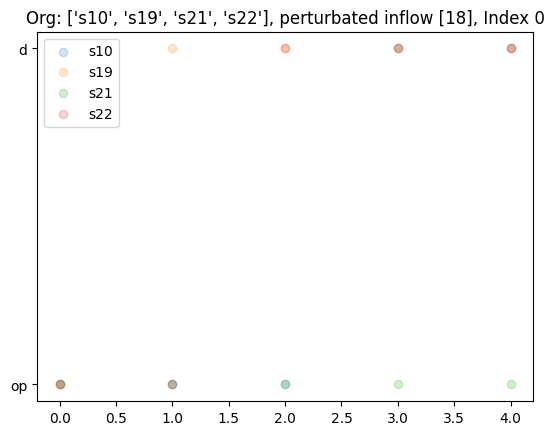

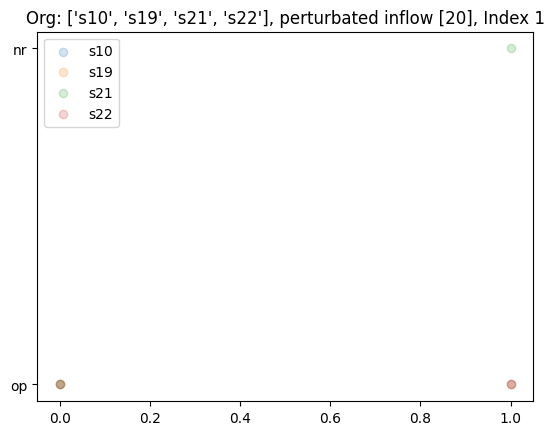

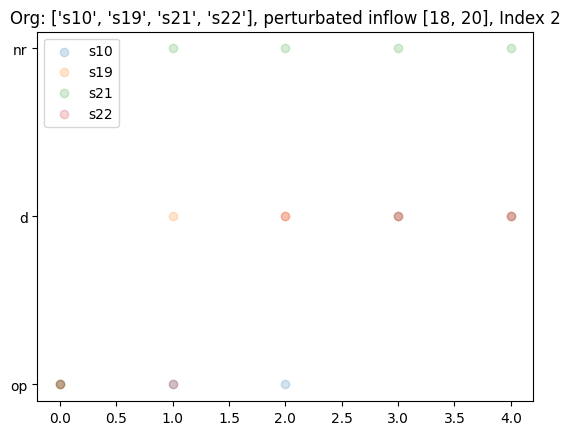

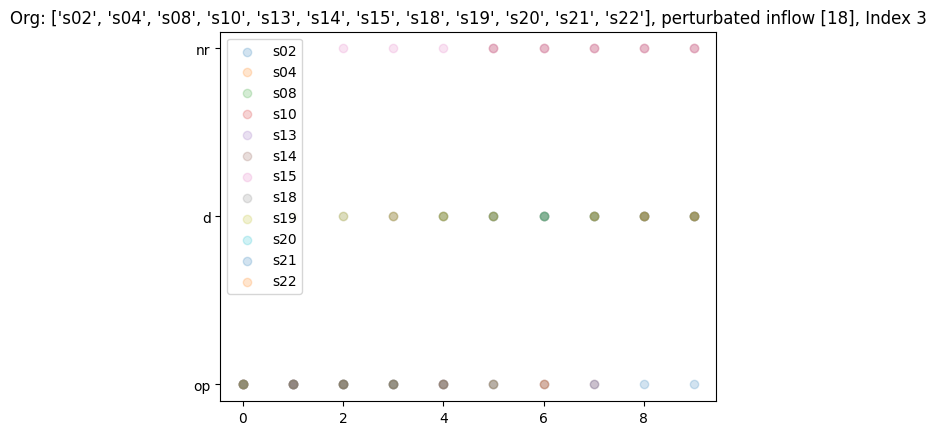

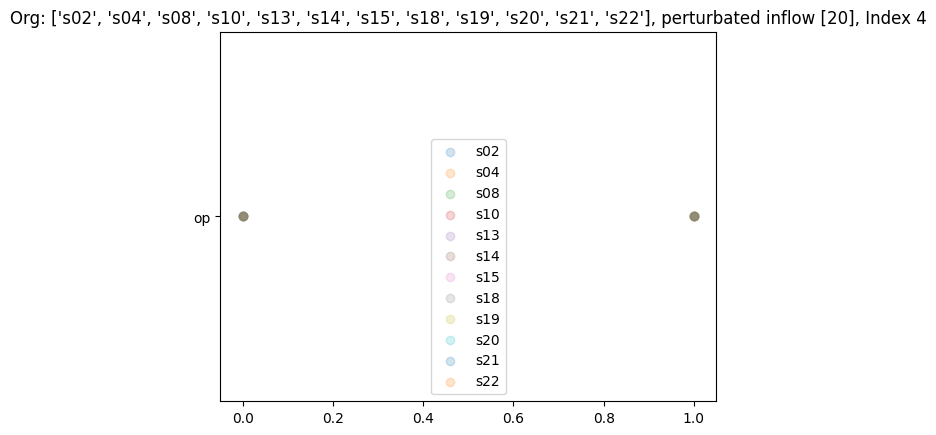

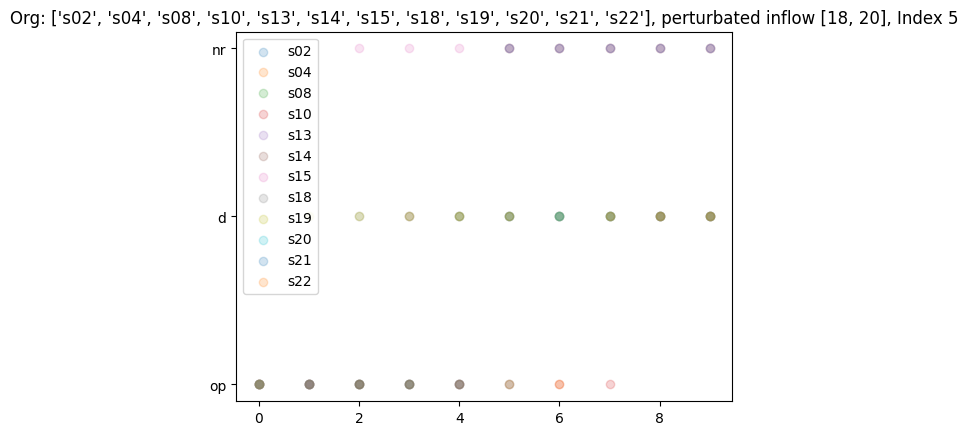

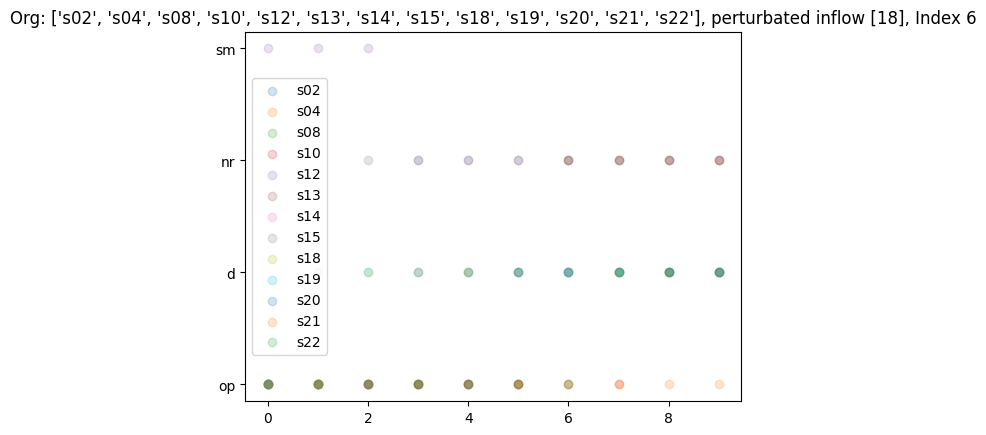

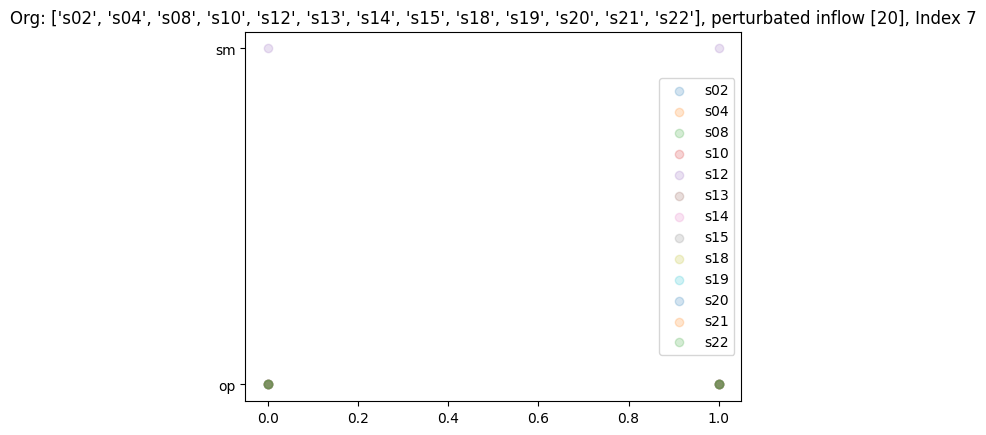

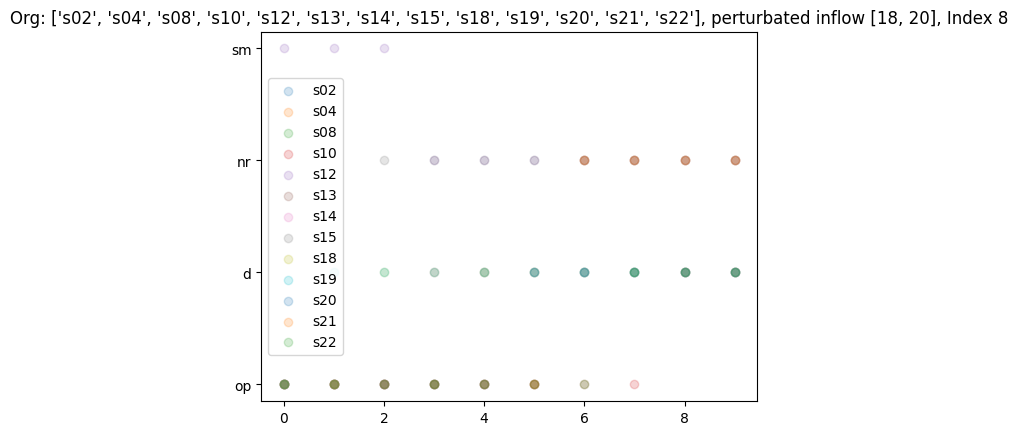

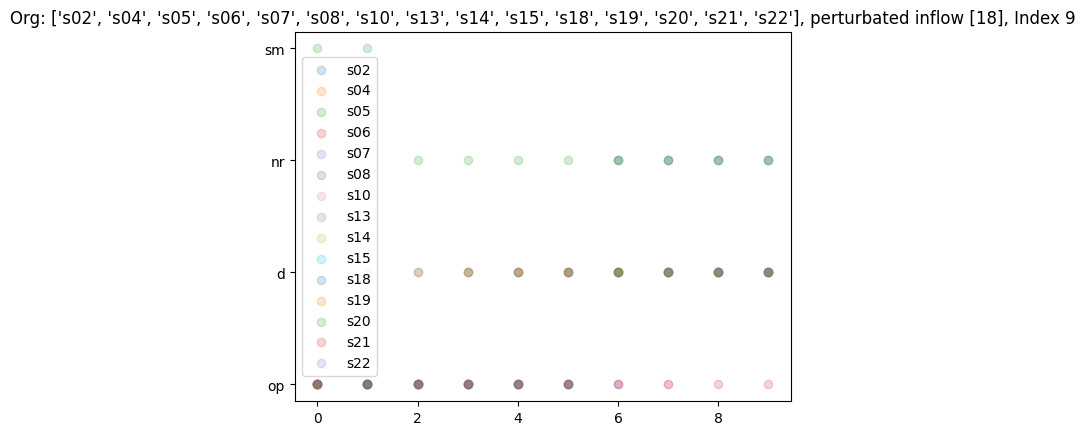

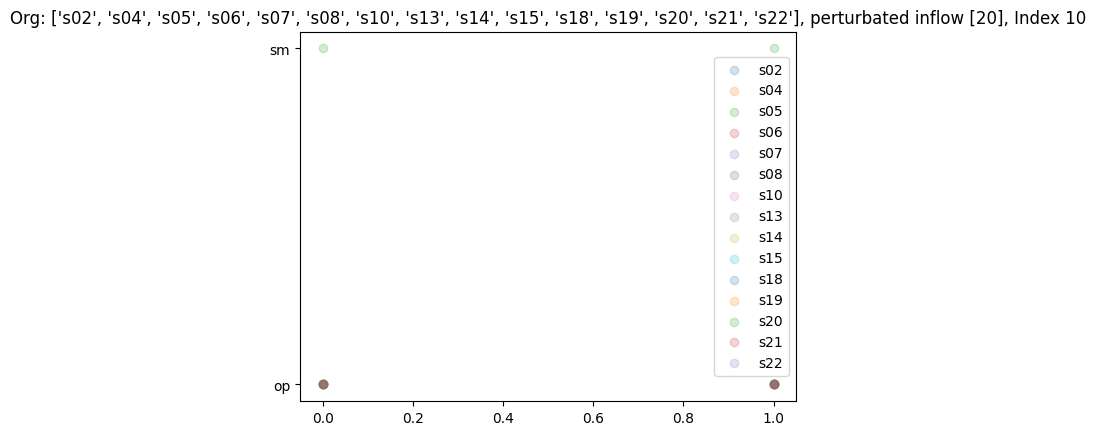

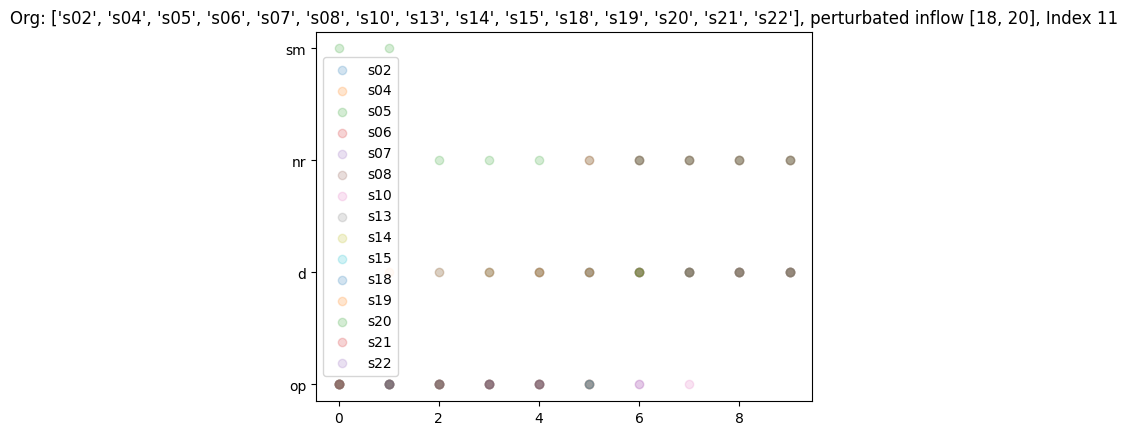

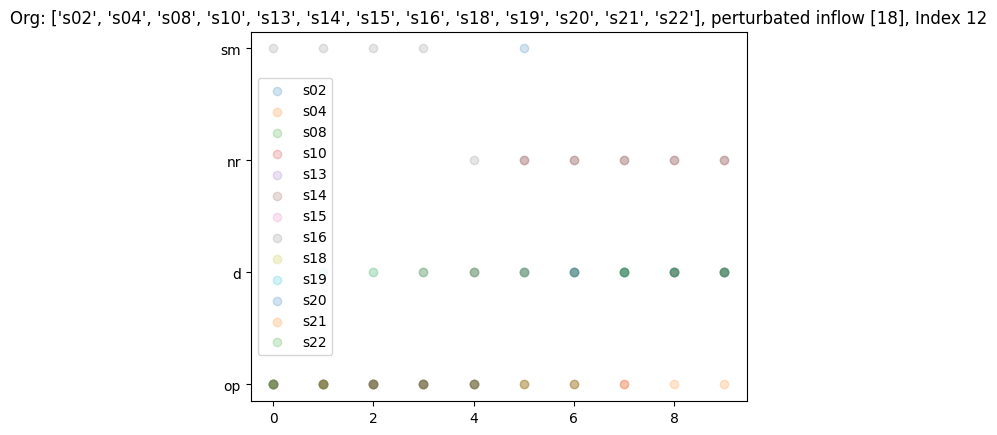

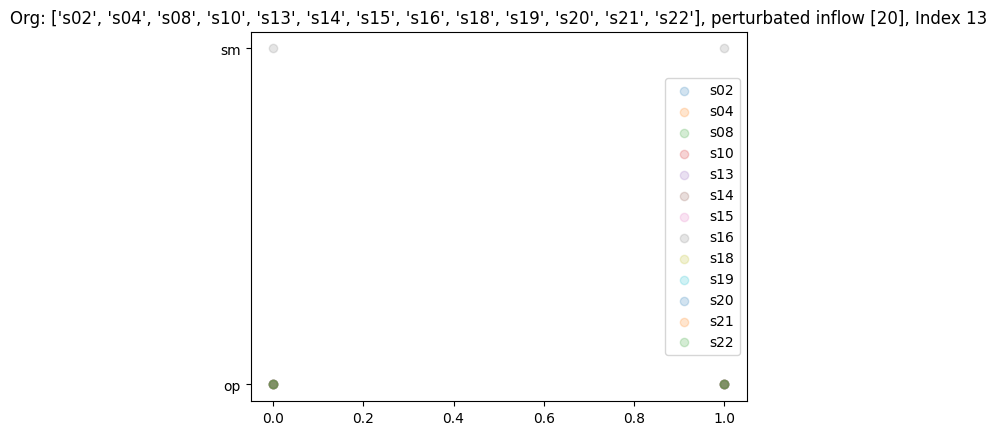

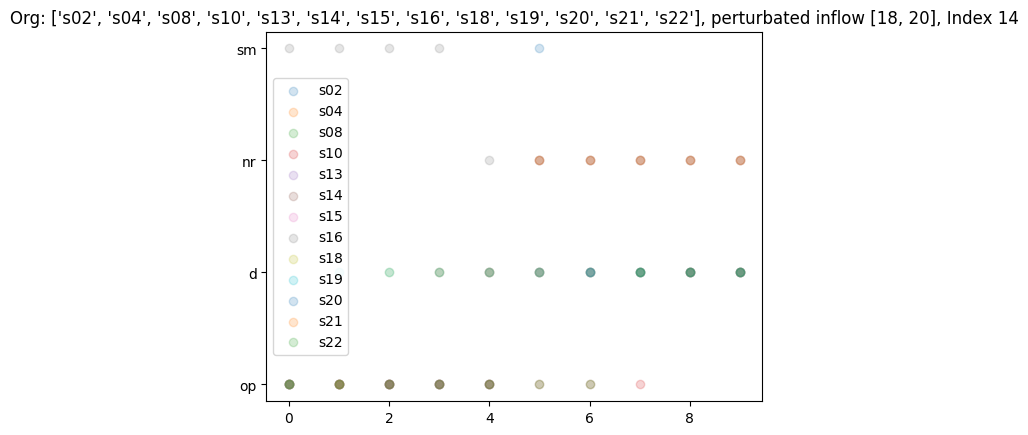

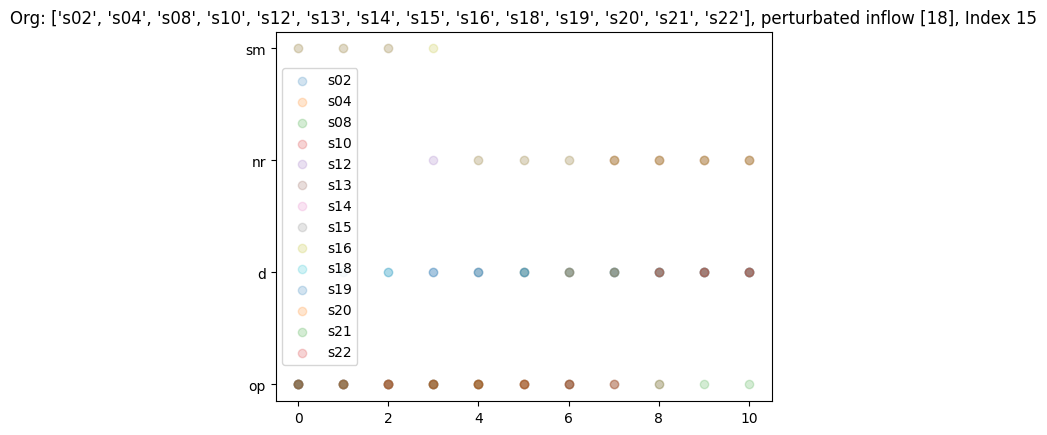

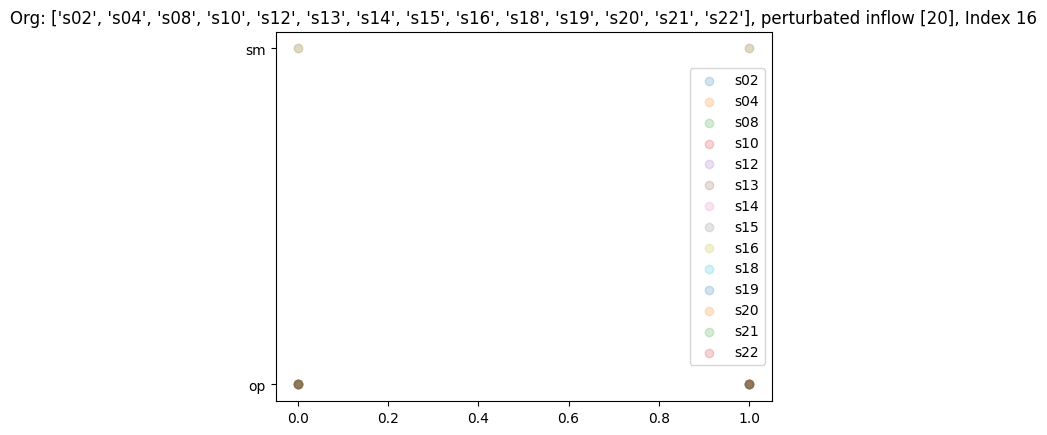

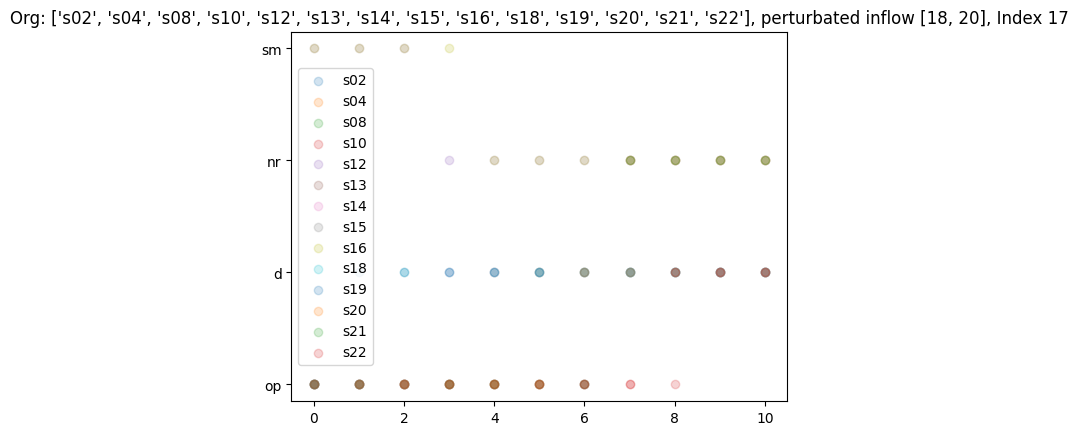

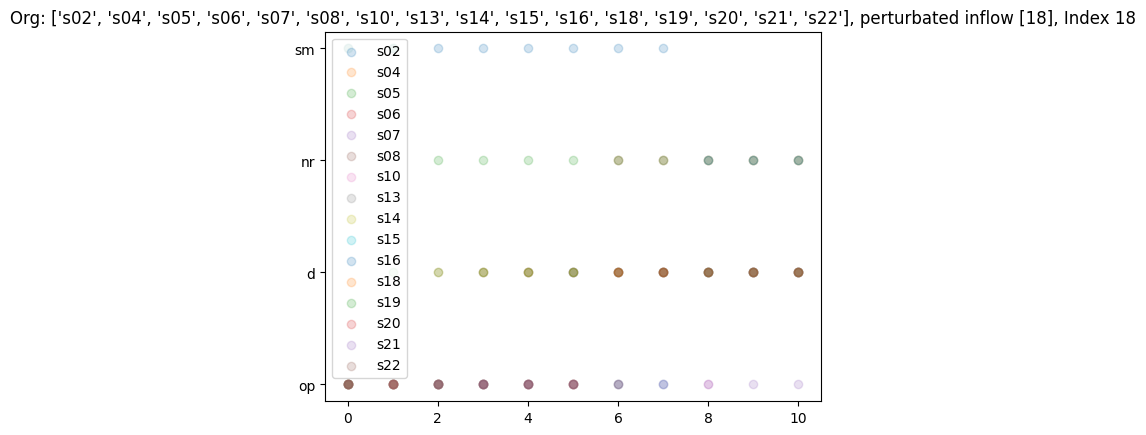

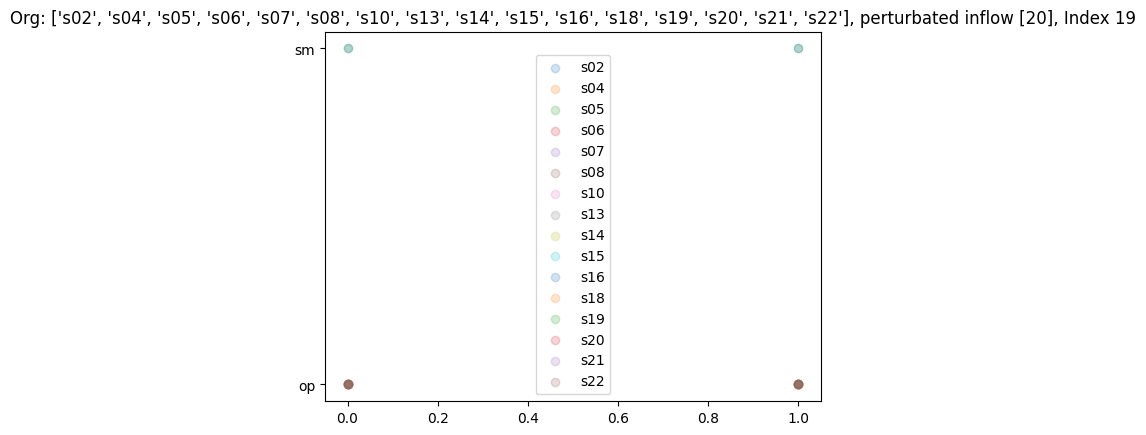

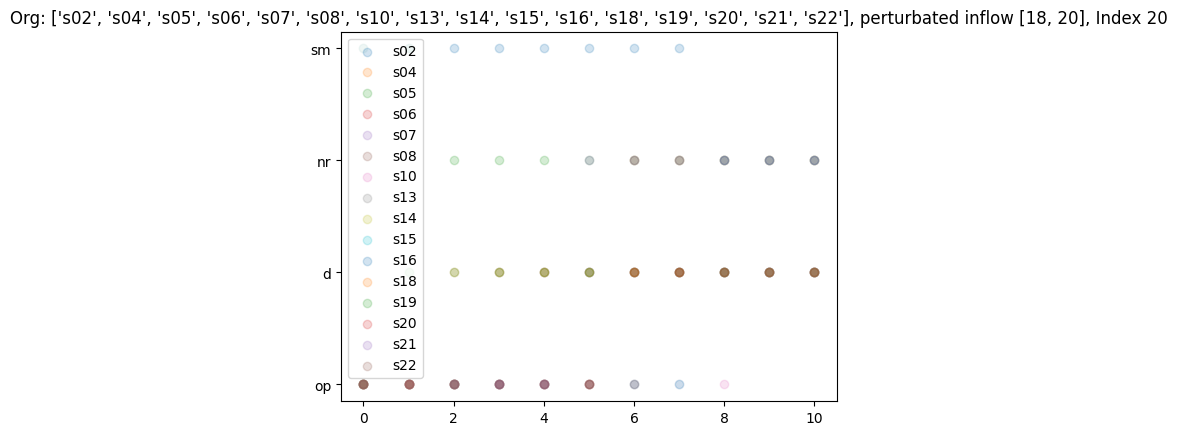

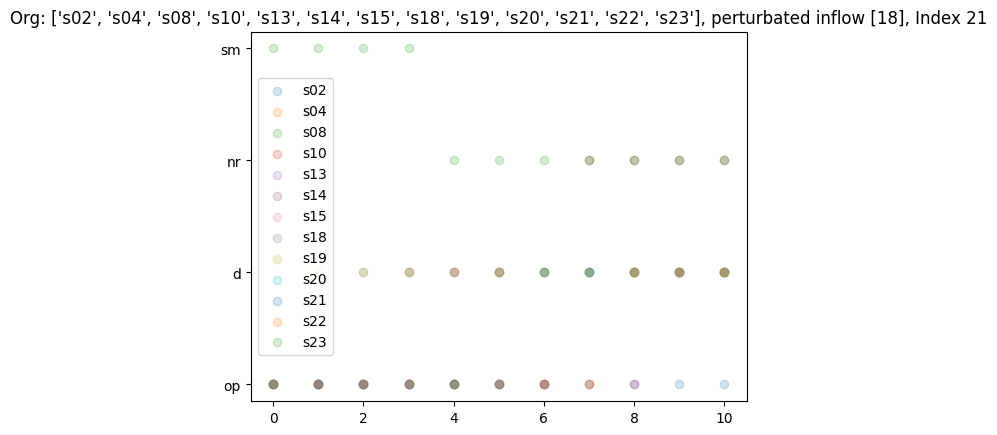

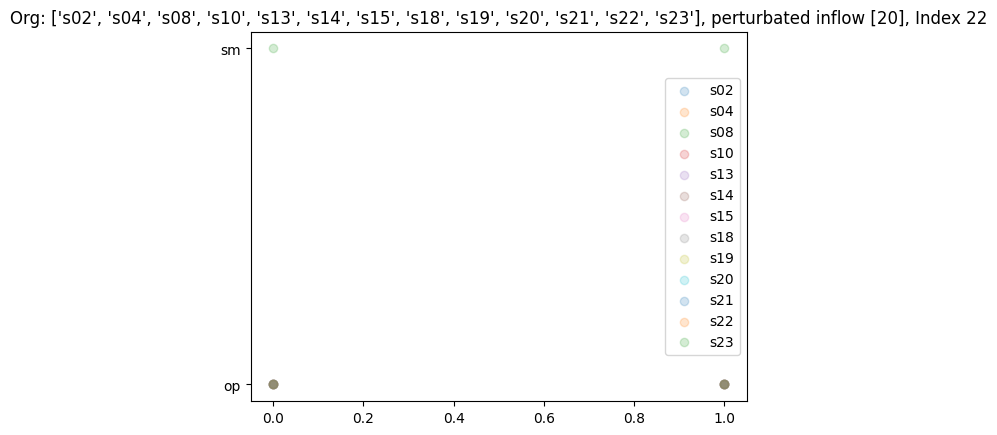

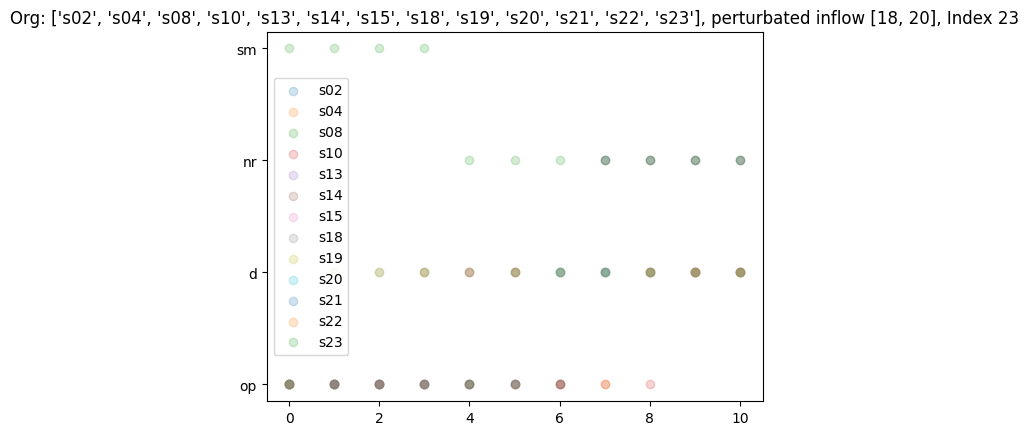

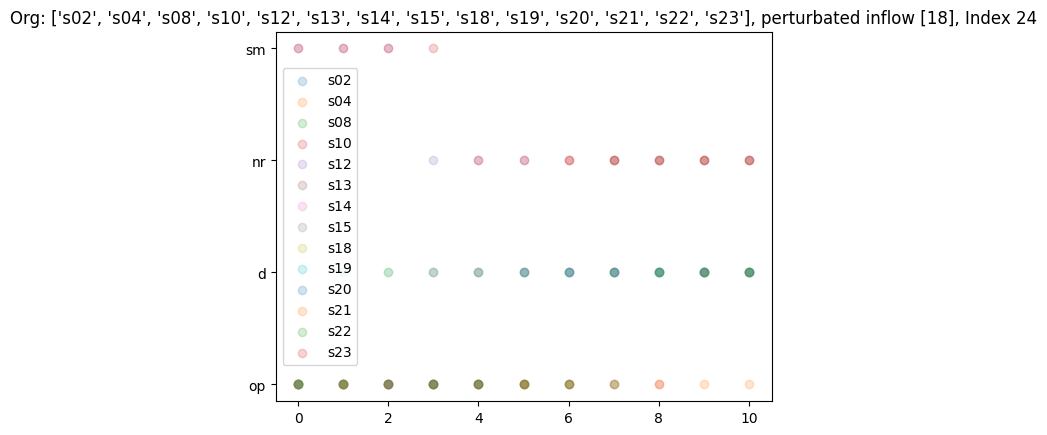

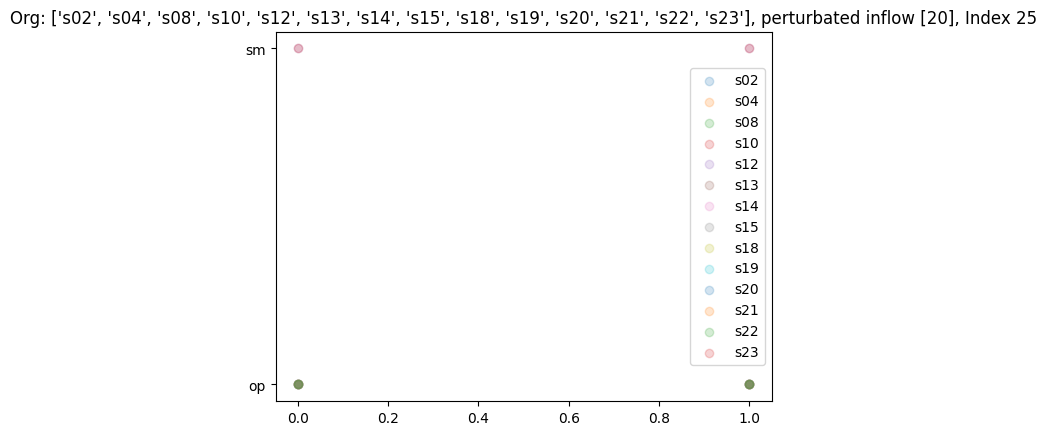

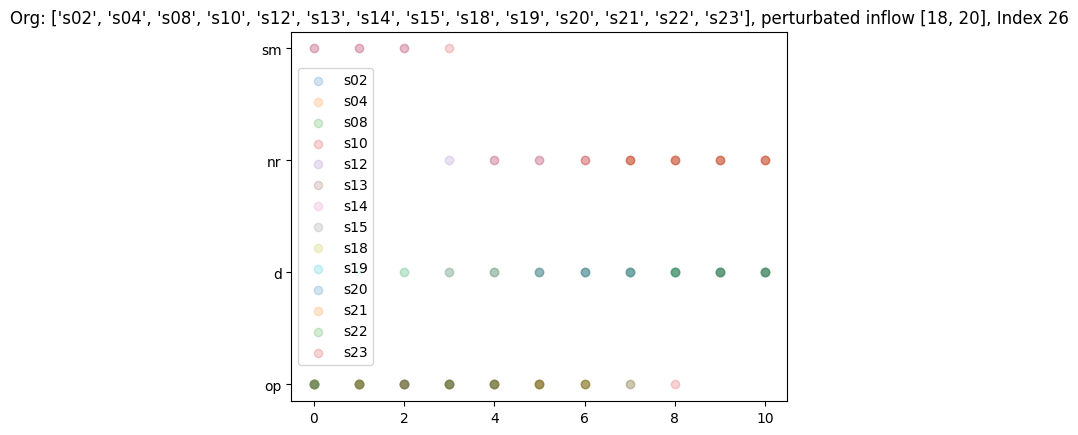

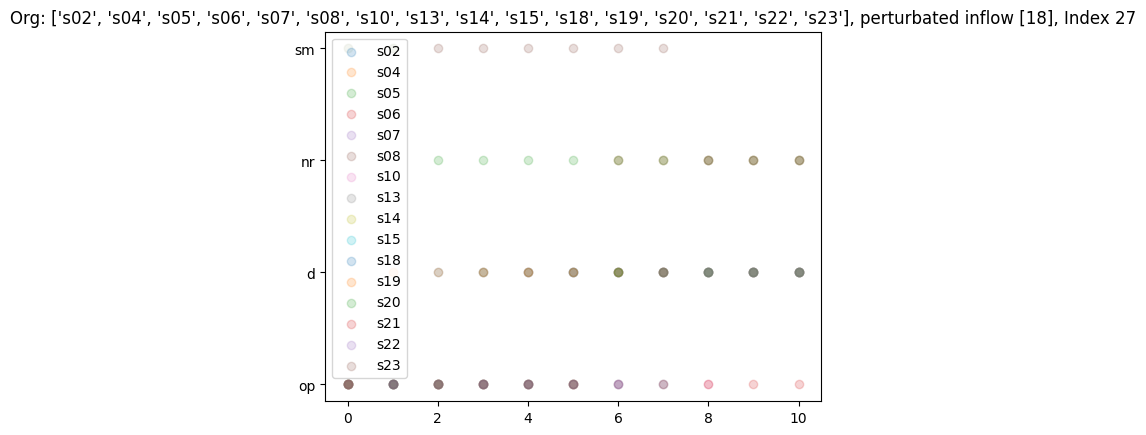

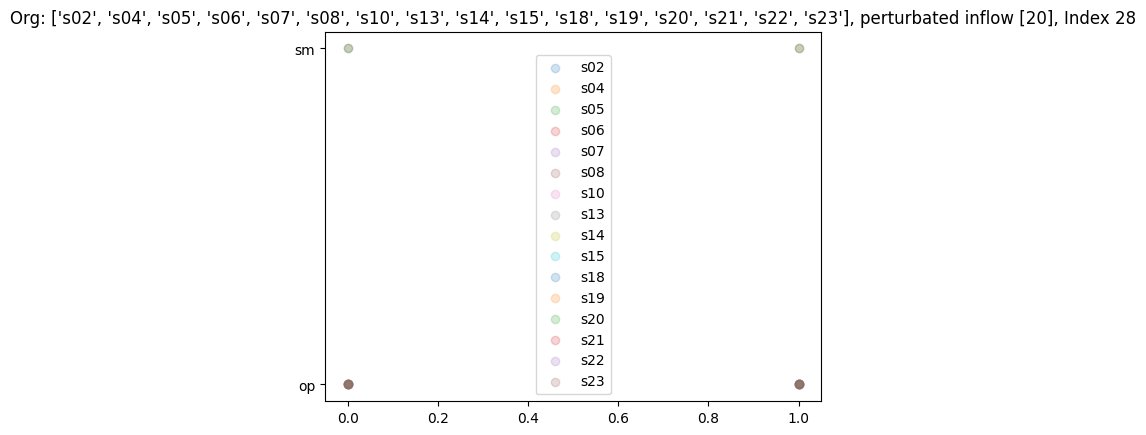

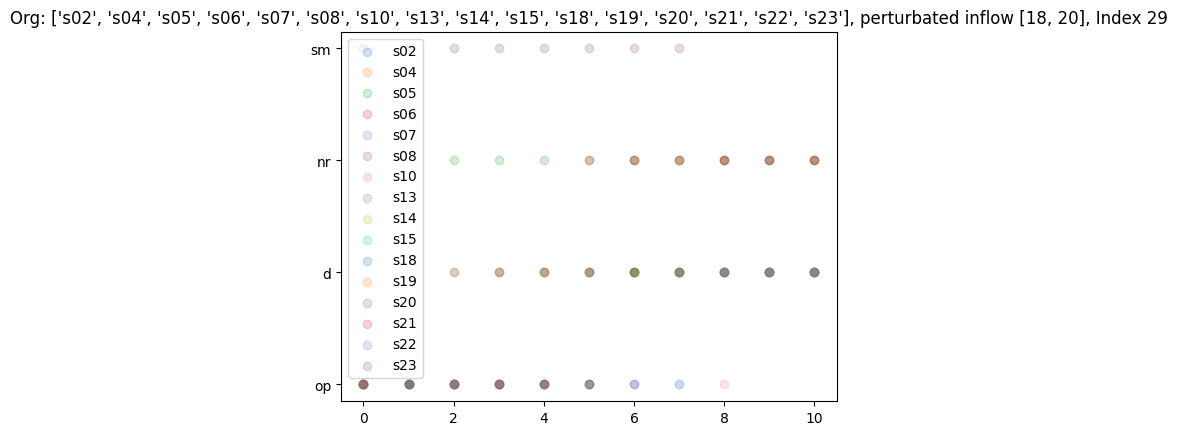

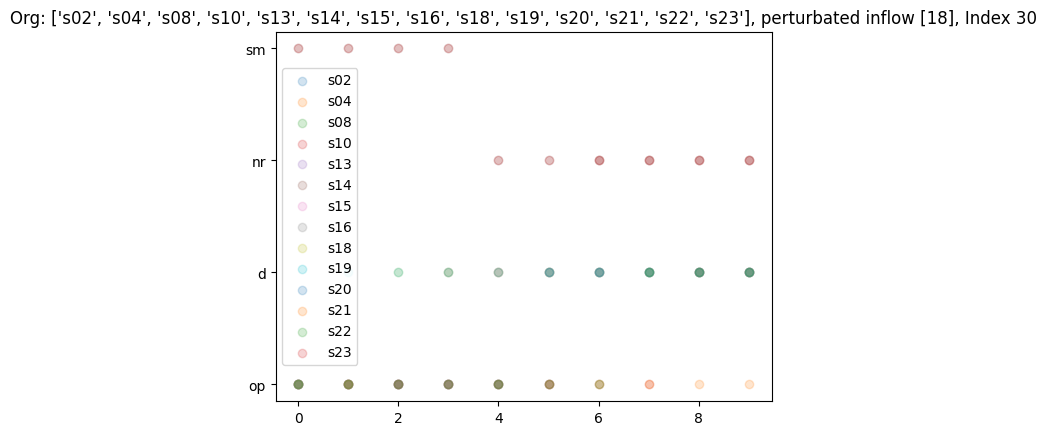

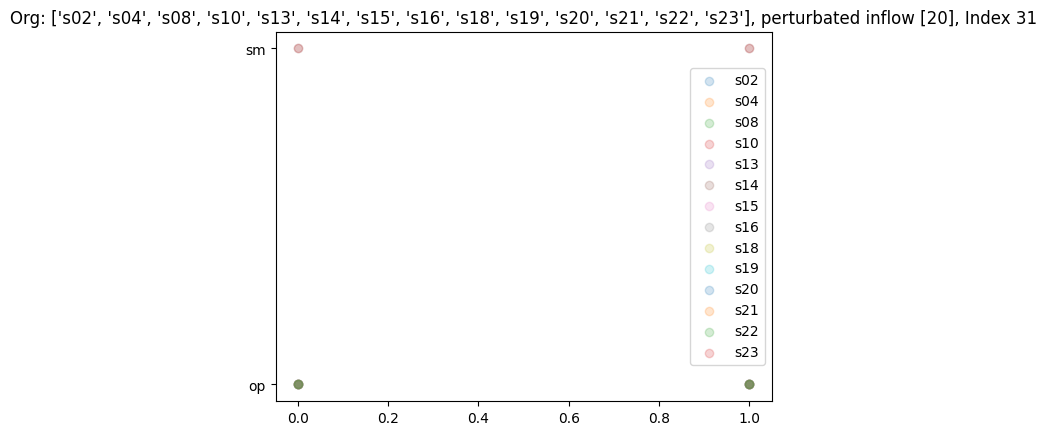

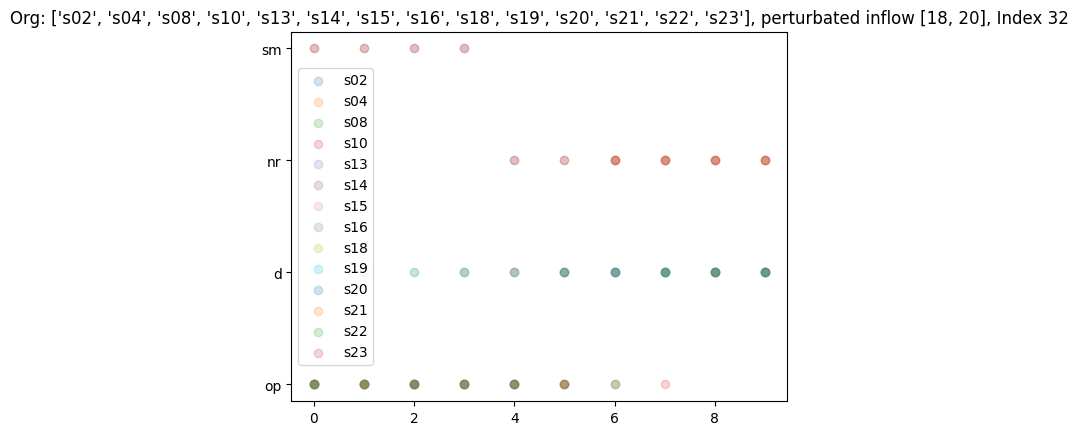

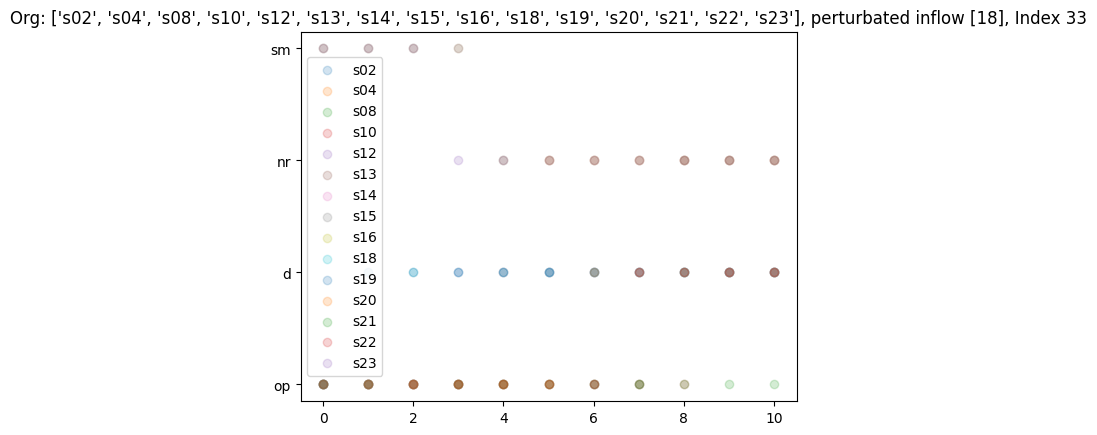

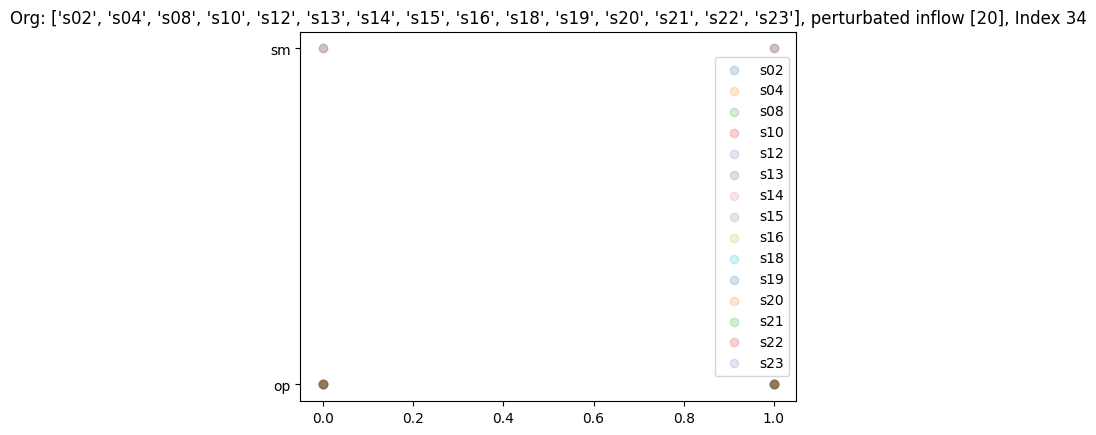

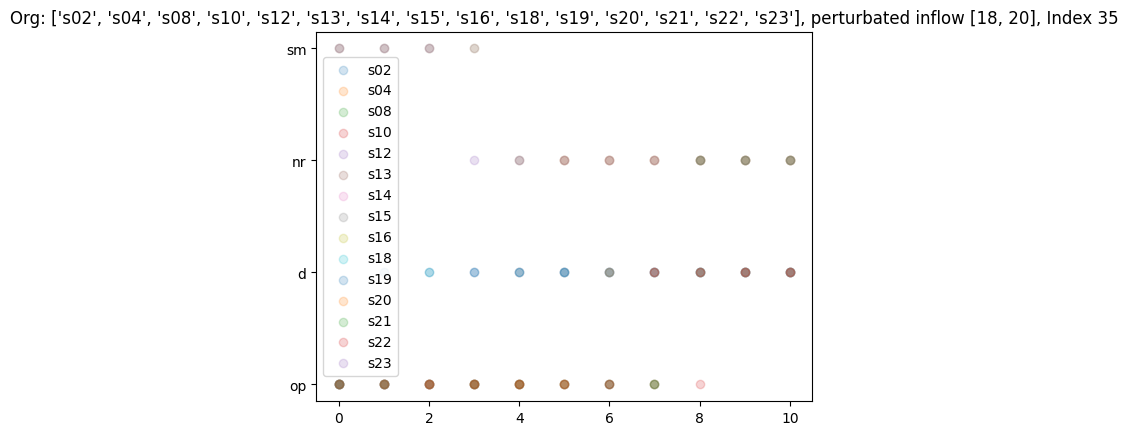

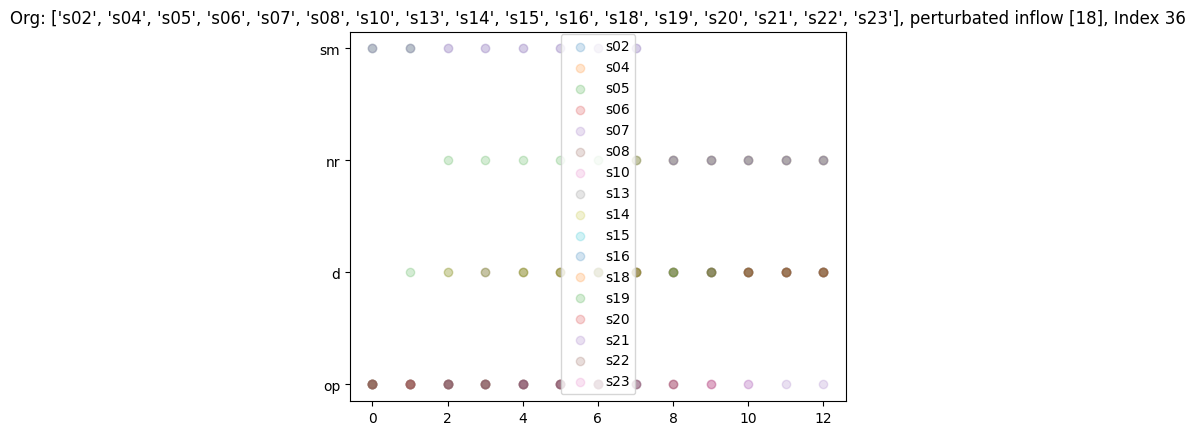

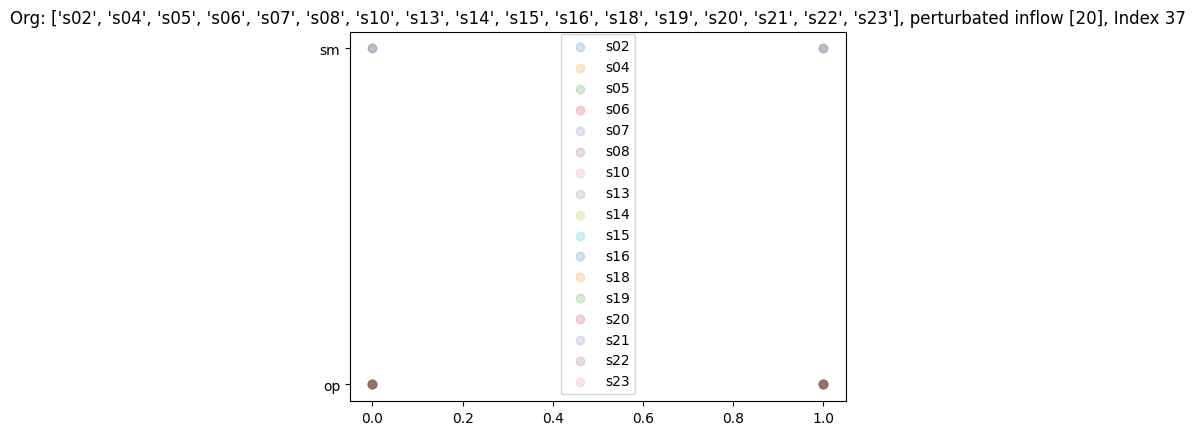

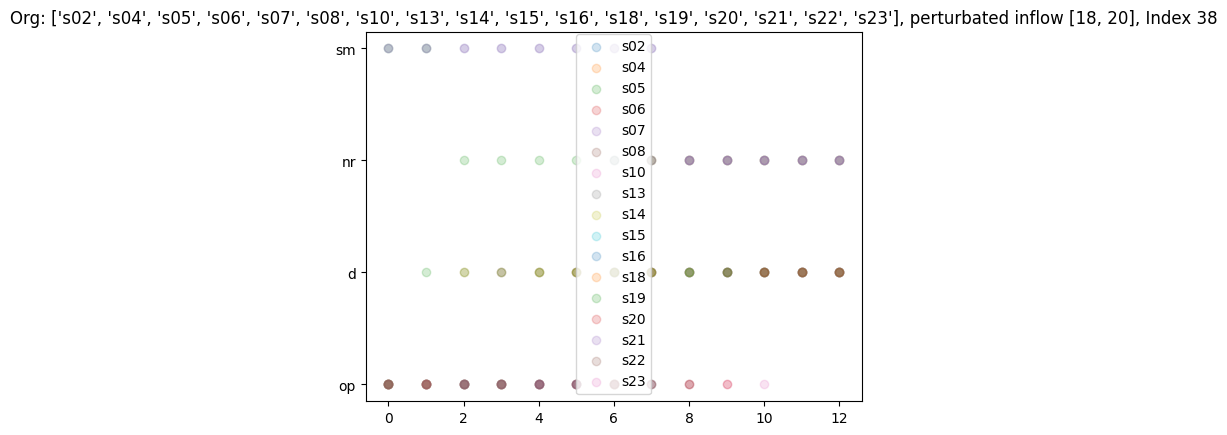

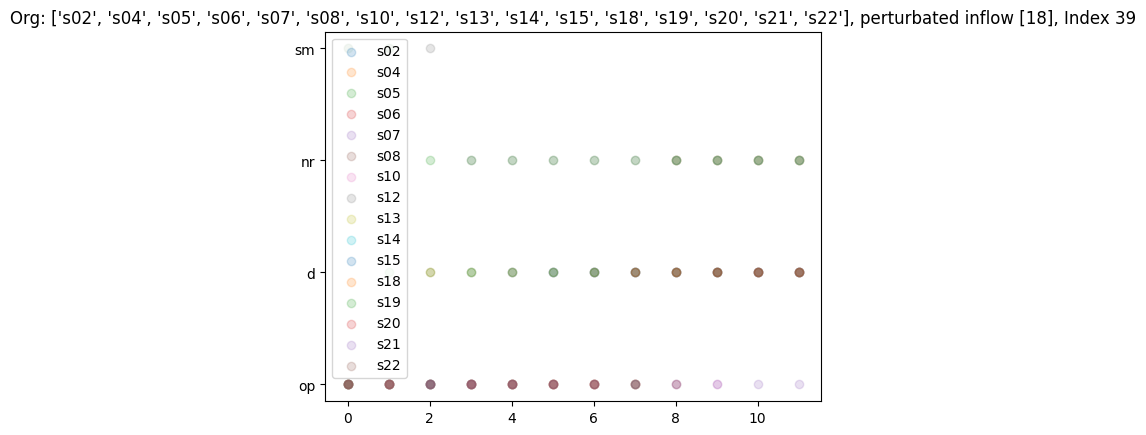

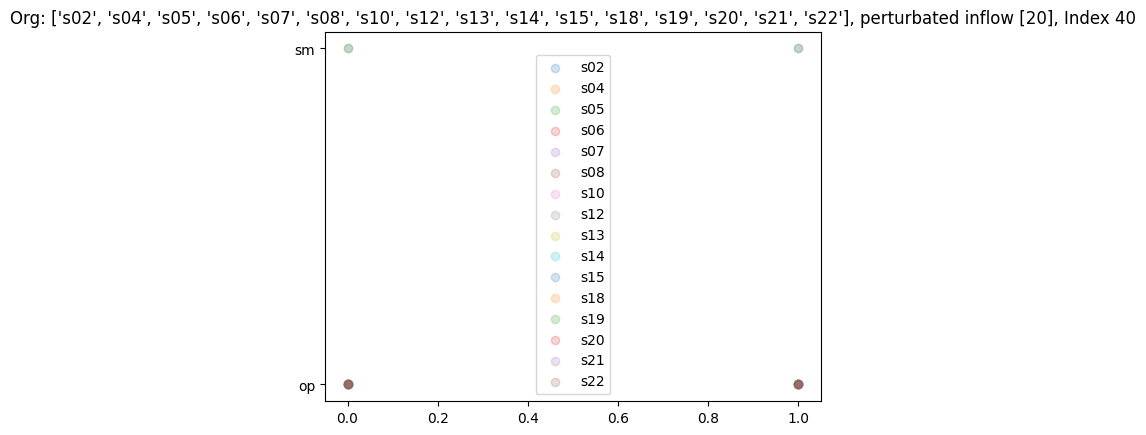

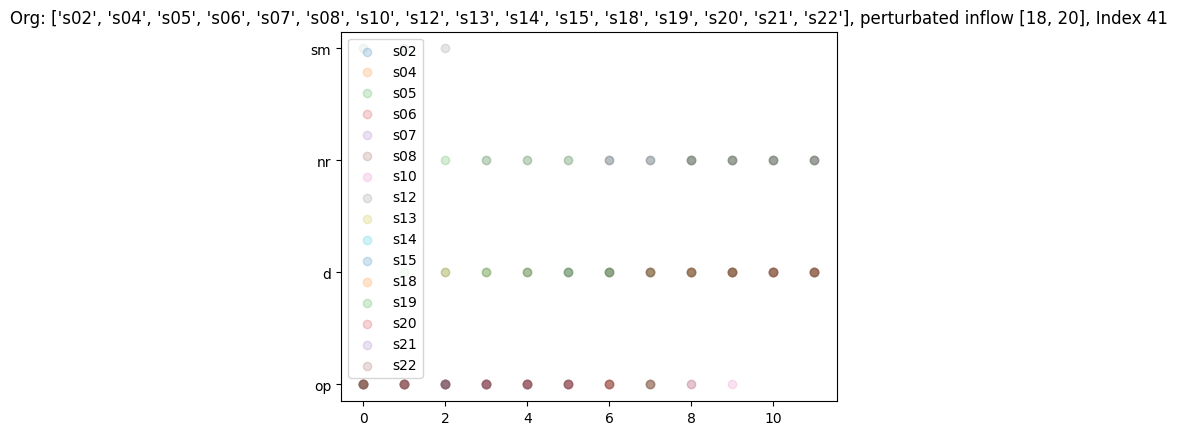

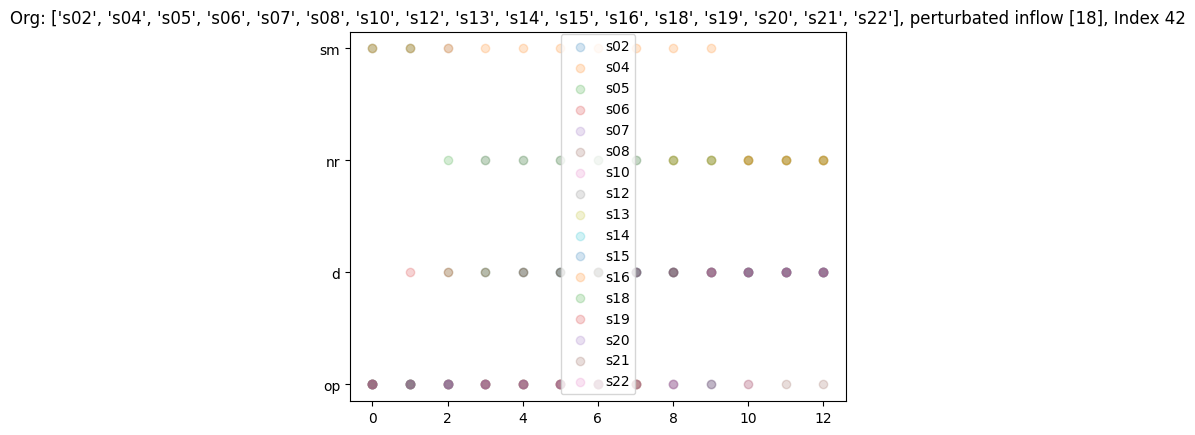

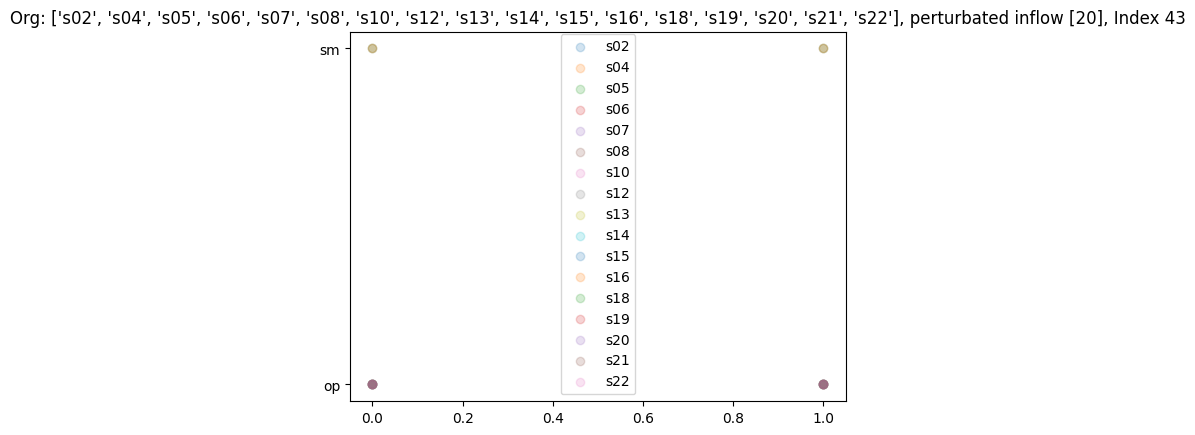

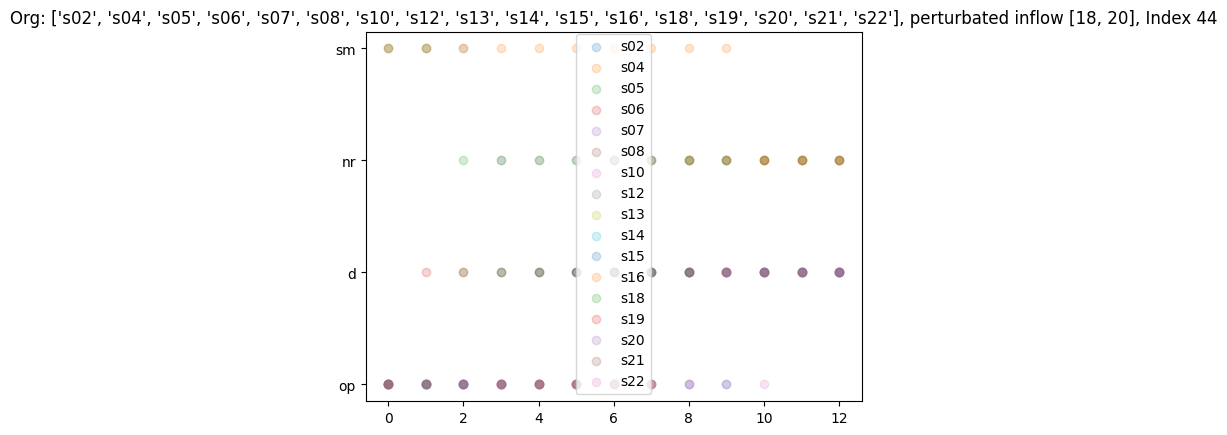

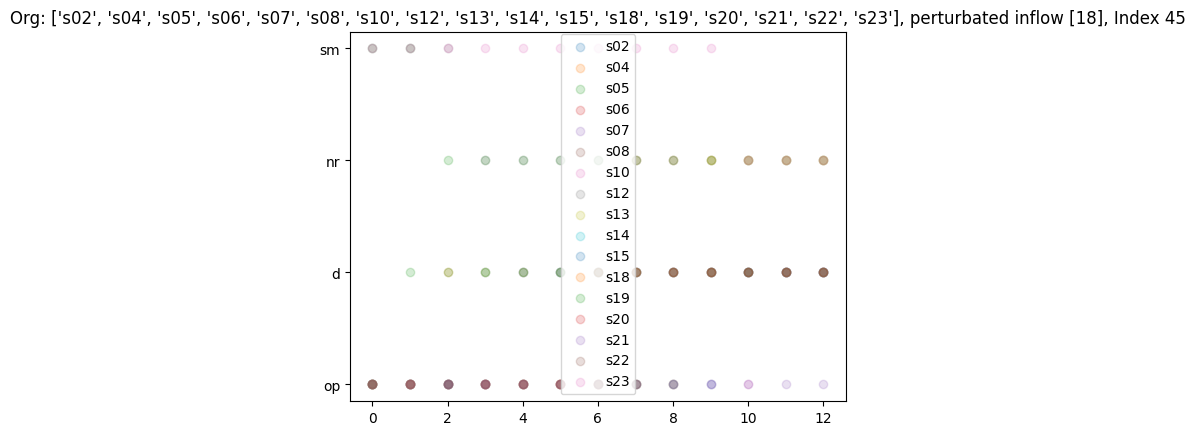

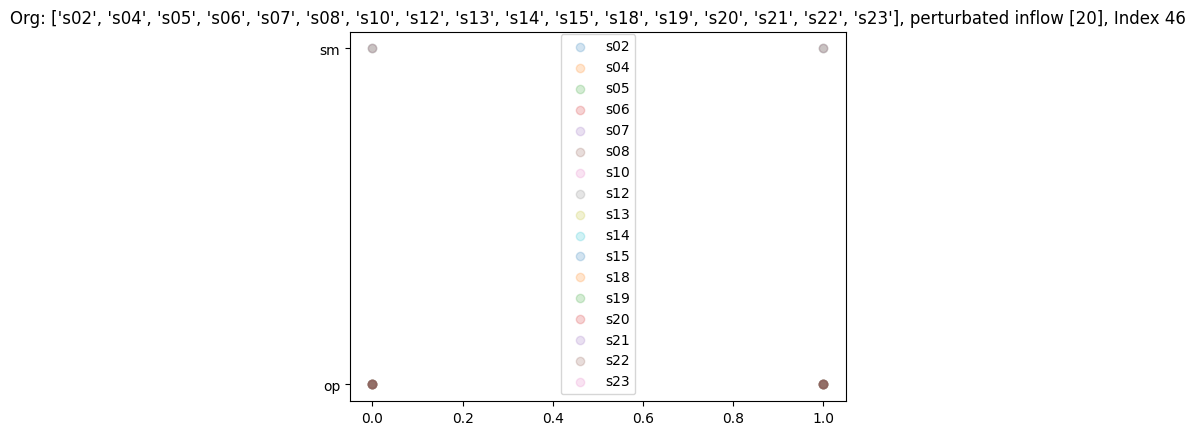

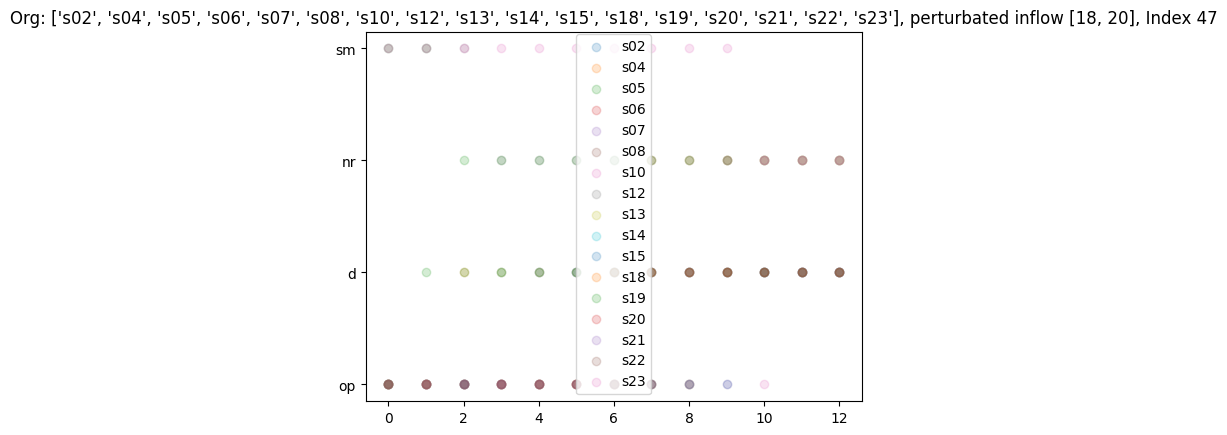

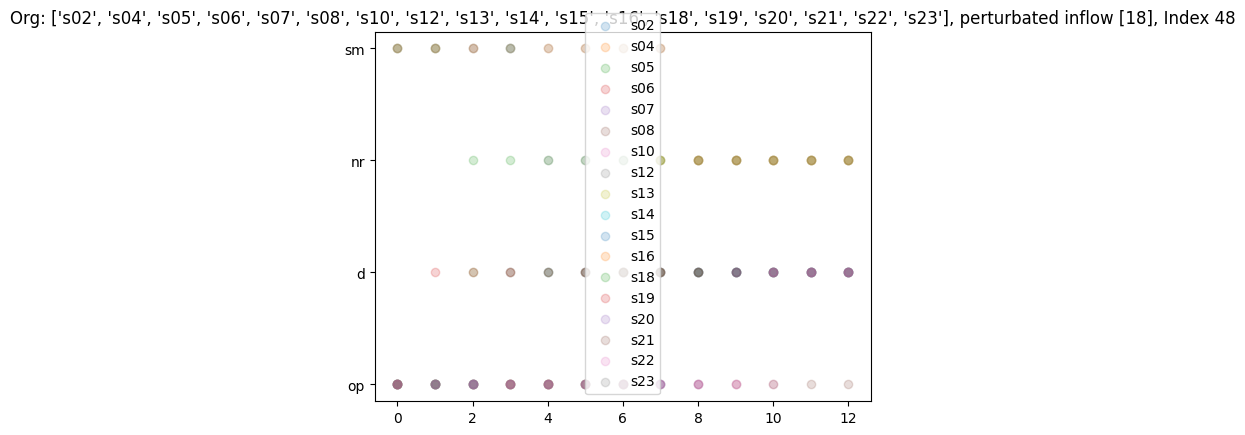

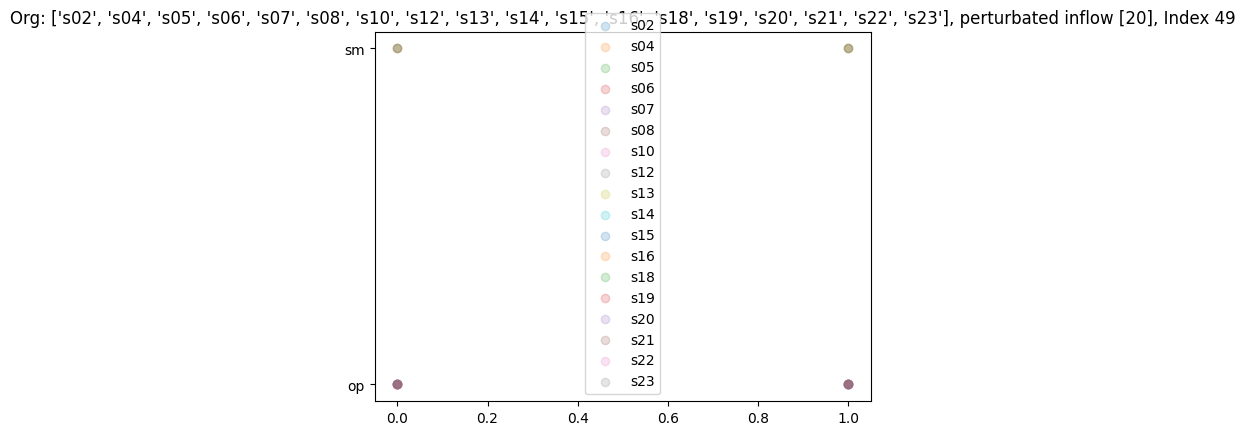

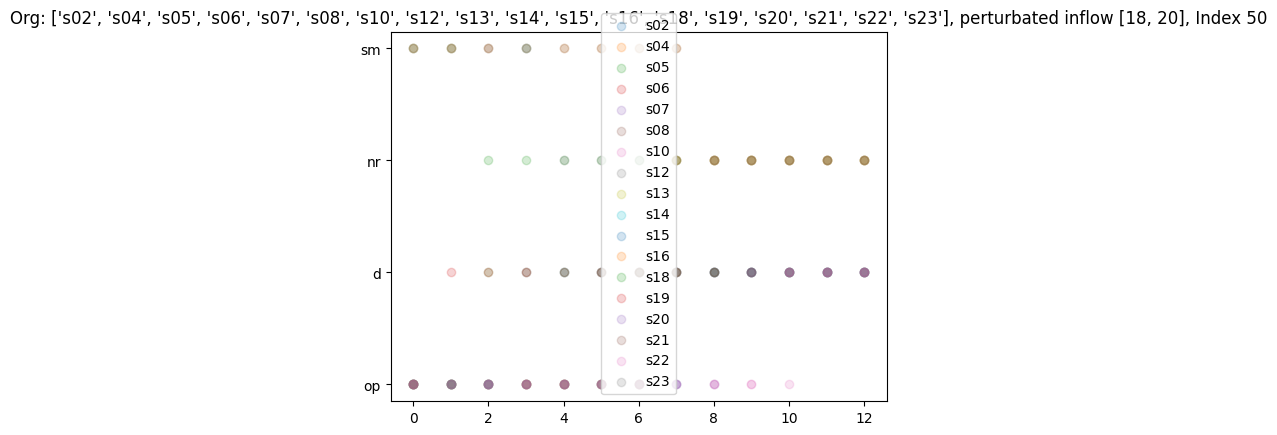

In [25]:
# Ploting the convergence for each organization and perturbation.
import pandas as pd
import matplotlib.pyplot as plt

for ind,j in enumerate(convergence):
    sp_fun=pd.DataFrame(j['species_function'])
    fig, ax = plt.subplots()
    org=[]
    for i in sp_fun.columns:
        data=sp_fun[i]
        if data[0]!="np":
            ax.scatter(list(sp_fun.index),data,label=i,alpha=0.2)
            org.append(i)
    ax.legend()
    ax.set_title("Org: "+str(org)+", perturbated inflow "+str(init_variables[ind][3])+", Index "+str(ind))
    plt.show()